In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pip install openpyxl # pd.read_excel gives error to read , so for resolve the error we run this command .

In [5]:
df = pd.read_excel('Superstore_USA.xlsx')

In [4]:
df.head(2) # View some data from top

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [ ]:
df.tail(2)  # View some data from bottom

In [6]:
df.shape # For getting the size of data (row * Column )

(9426, 24)

In [7]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

### Product Base Margin Have 72 null Values.

In [8]:
df.isnull().sum().sum()

np.int64(72)

In [ ]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace = True)

In [10]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

### Product Base Margin have 0 null values now.

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df['Order Priority'].value_counts()  # for getting count of different terms in a column.

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [13]:
df['Order Priority'].unique() # gives all unique terms inside column.

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [7]:
df['Order Priority']=df['Order Priority'].replace('Critical ','Critical') 
# replace Critical_ space with Critical so that all Critical will be same.

In [15]:
df['Order Priority'].unique() # gives all unique terms inside column. Critical is now merged .

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [16]:
df['Order Priority'].value_counts() 

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

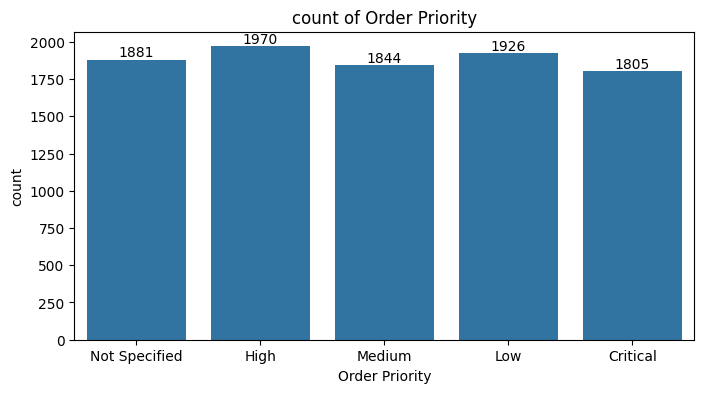

In [17]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x= "Order Priority",data = df)
ax.bar_label(ax.containers[0])
plt.title("count of Order Priority")


#                                           How to save this Graph into memory.

plt.savefig("Count of Order Priority.jpg")   # this line always written before plt.show() otherwise our saved image will be blank 


plt.show()


## Ship Mode

In [18]:
df["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

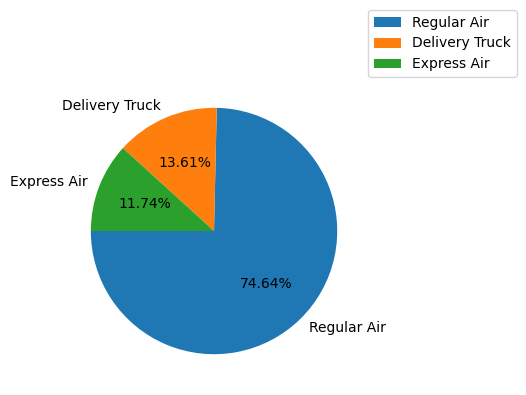

In [19]:
x =df["Ship Mode"].value_counts().index 
y = df["Ship Mode"].value_counts().values

plt.figure(figsize=(4,4))
plt.pie(y,labels= x,startangle=180,autopct="%0.2f%%") 

#                                                                startangle for rotate pie chart on its axis.
#                                          for showing percentages [autopct="%0.2f%%"] or [autopct="%1.2f%%"]this formula is mendatory.

plt.legend(loc =(1,1)) # for applying legends & changing legend position we use loc()



plt.show()


# Above are Univariate Analysis 👆

# Now Below are Bivariate Analysis 👇


# Ship Mode


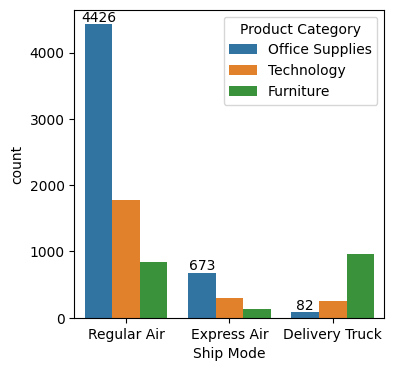

In [20]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Ship Mode',data = df,hue= 'Product Category') # bivariate analysis by Hue
ax.bar_label(ax.containers[0])

plt.show()

# Customer Segment


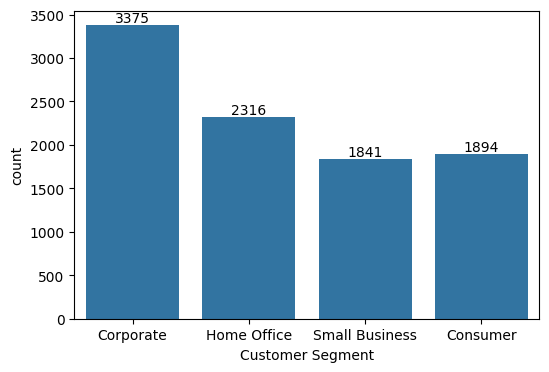

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Customer Segment',data = df)
ax.bar_label(ax.containers[0])
plt.show()

# Product Category


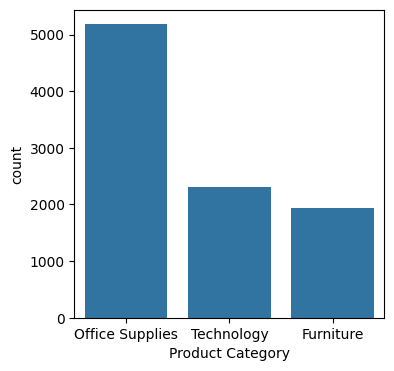

In [22]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Product Category',data = df)
plt.show()

## Analyse which sub-Categories have higher order and Come under which Product Category.
#### Bivariate 👇

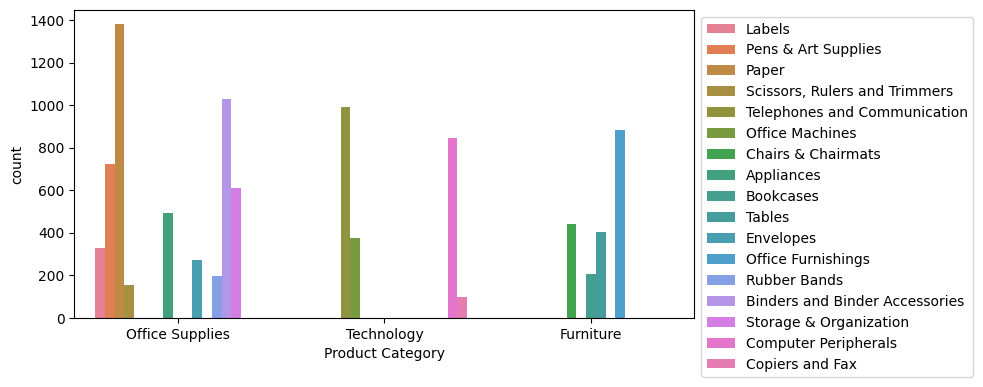

In [23]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Product Category',data = df,hue = 'Product Sub-Category')
plt.legend(bbox_to_anchor =(1,1))     # Customize Legend Loaction
plt.show()

### The graph contains many information so it is hard to understand in one plot. So we plot different charts for easier understanding.


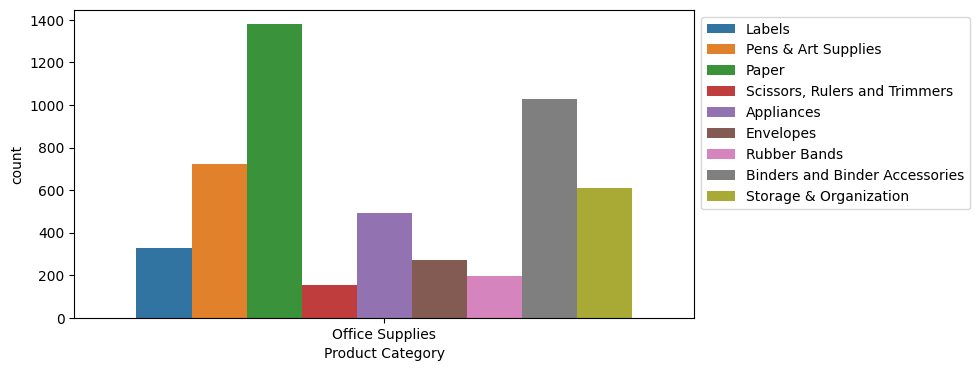

In [24]:
#                                                  In Office Supplies


plt.figure(figsize=(8,4))
ax = sns.countplot(x='Product Category',data = df[df['Product Category']=='Office Supplies'],hue = 'Product Sub-Category')
plt.legend(bbox_to_anchor =(1,1))     # Customize Legend Loaction
plt.show()

In [25]:
x = df[df['Product Category']=='Office Supplies'] # By this we can get only 'office supply' data in Product category data.
x.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


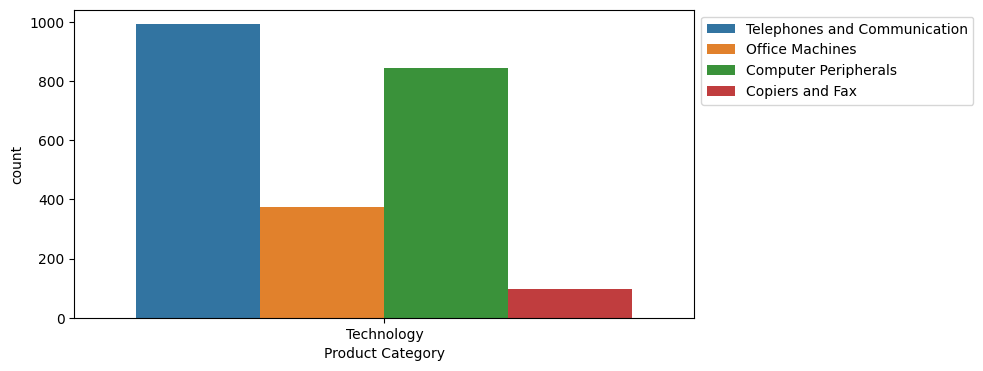

In [26]:
#                                                  In Technology


plt.figure(figsize=(8,4))
ax = sns.countplot(x='Product Category',data = df[df['Product Category']=='Technology'],hue = 'Product Sub-Category')
plt.legend(bbox_to_anchor =(1,1))     # Customize Legend Loaction
plt.show()

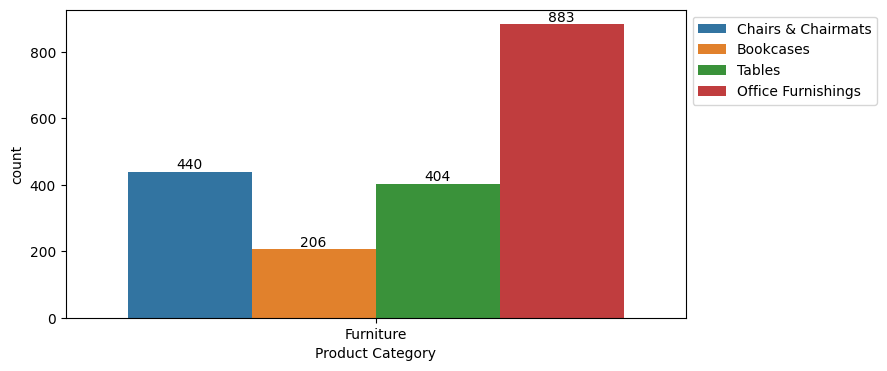

In [27]:
#                                                  In Furniture


plt.figure(figsize=(8,4))
ax = sns.countplot(x='Product Category',data = df[df['Product Category']=='Furniture'],hue = 'Product Sub-Category')
plt.legend(bbox_to_anchor =(1,1))     # Customize Legend Loaction

# For Labels above Bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

plt.show()


### Multivariate Analysis also done when we do multiple column analysis. 

# Time Series Analysis

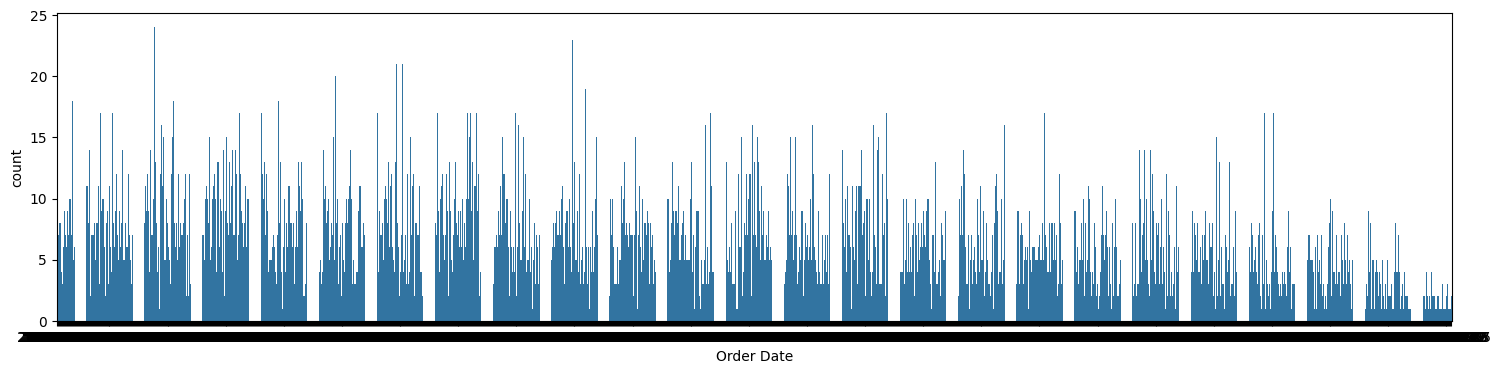

In [28]:
plt.figure(figsize=(18,4))
ax = sns.countplot(x='Order Date',data = df )
plt.show()

In [29]:
df.info()

#  18  Order Date            9426 non-null   datetime64[ns]
#  19  Ship Date             9426 non-null   datetime64[ns]        both are already in Datetime & So we can extract Year from this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [30]:
df['Order_Year'] = df['Order Date'].dt.year    # For converting all dates into year so our plot will be simpler.
df['Order_Year'].head(5)                          # new column is created named Order_Year in our dataframe df.   

0    2012
1    2010
2    2011
3    2011
4    2011
Name: Order_Year, dtype: int32

In [31]:
df['Order_Year'].value_counts() 

Order_Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

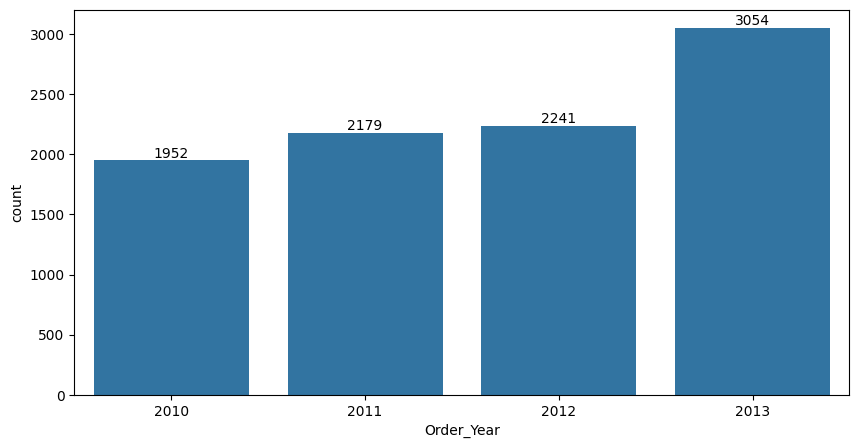

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Order_Year',data = df)  # then Now we have 'Order_Year' in df and that's why we give x='Order_year'
ax.bar_label(ax.containers[0])
plt.show()

# Profit By Product Category

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Product Category',y= 'Profit')
plt.show()

# it takes huge time because profit have many values which are different so we have to mean it or sum it etc.👇

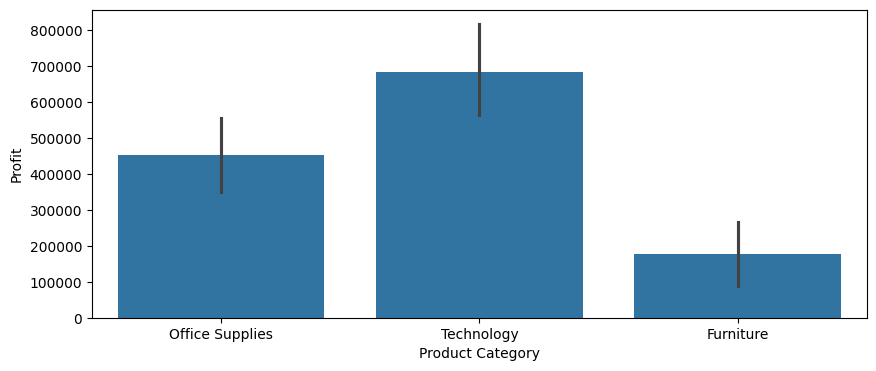

In [34]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Product Category',y= 'Profit',data = df,estimator="sum")
plt.show()

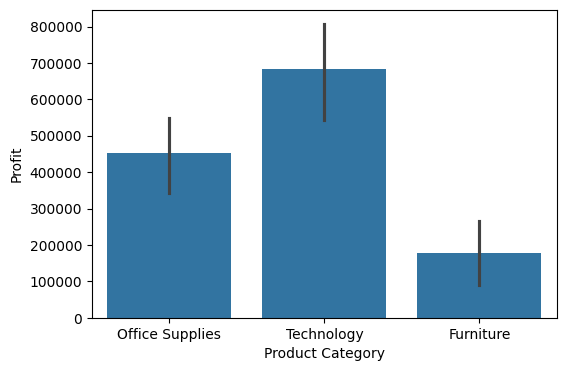

In [18]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Product Category',y= 'Profit',data = df,estimator="sum")
plt.show()

# State Wise Sale

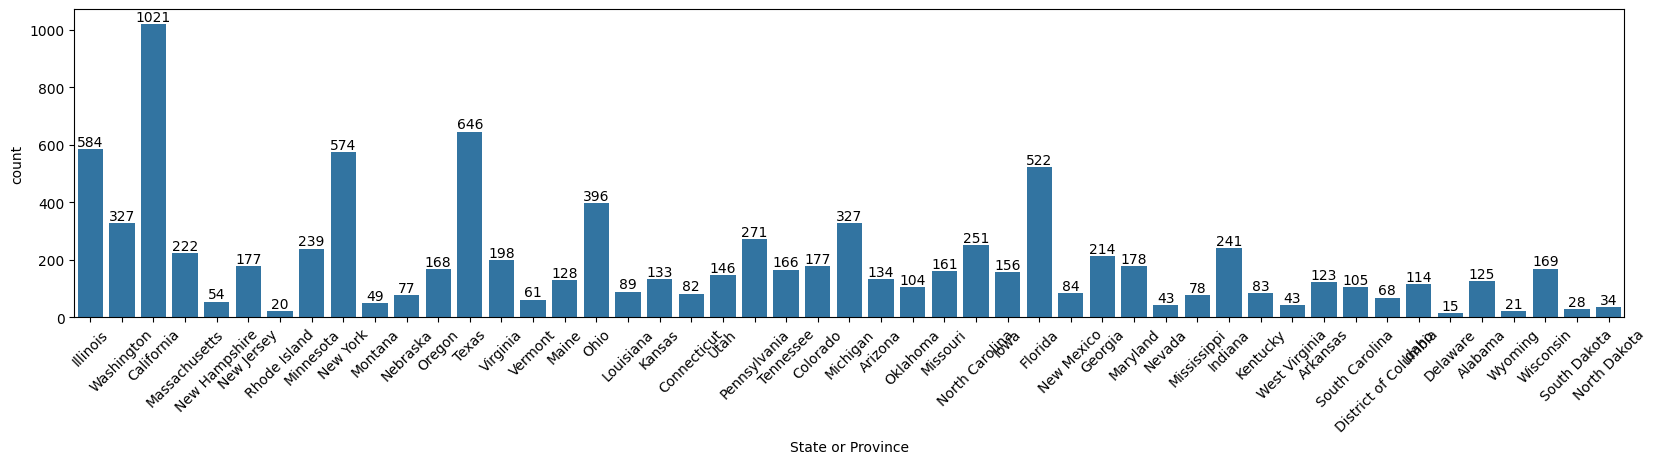

In [14]:
plt.figure(figsize=(20,4))
ax= sns.countplot(x='State or Province',data = df,)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)  # for rotating x axis labels we use xtixks.
plt.show()

In [12]:
df['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [17]:
df['State or Province'].value_counts()[:5]   # [:5] for only viewing Top 5

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

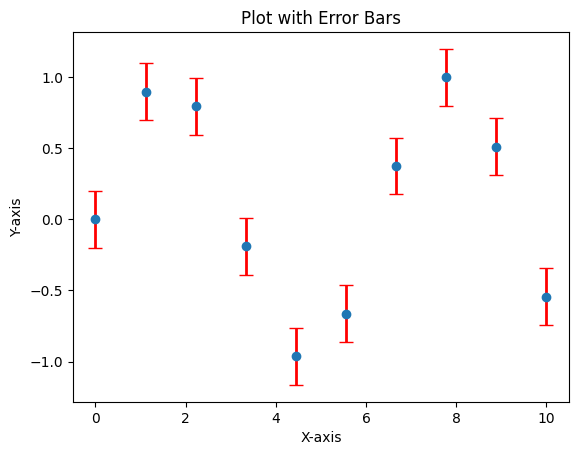

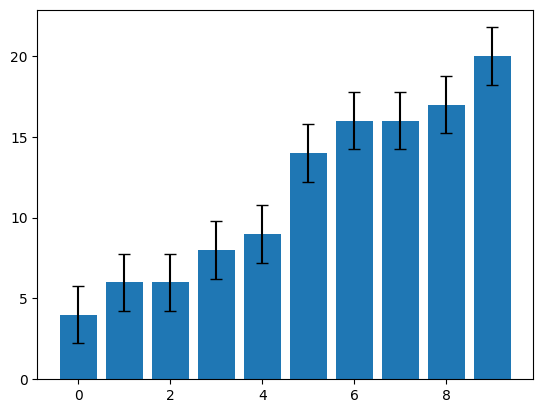

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 10)
y = np.sin(x)
yerr = 0.2  # Error values

# Plot with error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, ecolor='red', elinewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Error Bars')
plt.show()
data = [4, 6, 6, 8, 9, 14, 16, 16, 17, 20]
std_error = np.std(data, ddof=1) / np.sqrt(len(data))

fig, ax = plt.subplots()
ax.bar(x=np.arange(len(data)), height=data, yerr=std_error, capsize=4)
plt.show()
